In [1]:
import numpy as np
from matplotlib import pyplot as plt

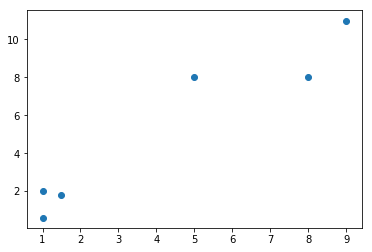

In [2]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])
plt.scatter(x[:,0],x[:,1])
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [4]:
k_means=KMeans(n_clusters=2)

In [5]:
k_means.fit(x)     #bydeafualt n_cluster=8....... init use kmeans++  algo which means select point in such a
                   #way that points are far fromeach other
             #n_init how many time again to run from restart

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
k_means.labels_

array([1, 1, 0, 0, 1, 0])

In [7]:
centers=k_means.cluster_centers_
centers

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

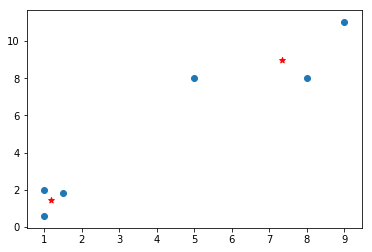

In [8]:
plt.scatter(centers[:,0],centers[:,1],c='r' ,marker='*')
plt.scatter(x[:,0],x[:,1])

plt.show()

In [53]:
class k_means :
    def __init__(self,k=2,max_iter=100):
        print("constructor")
        self.k=k
        self.max_iter=max_iter
        
    def fit(self,data):
        #MAINTAIN LIST OF MEANS 
        #CLUSTER INFO ie WHICH POINT BELONGS TO WHICH POINT
        self.mean=[]
        #randomly initiazlize means
        #in our case we are just appending the first k points to our means
        for i in range(self.k):
            self.mean.append(data[i])

        for i in range(self.max_iter):
            #assinge the data points to the clluster that they belong to
            #creating empty cluster
            clusters=[]
            for j in range(self.k):
                clusters.append([])

            for points in data:
                #find distance to all mean value
                #find the min distance
                #find the mean for which we got mini distance
                #add this point to cluster with min distnace
                distances=[((points-m)**2).sum() for m in self.mean]
                minDistances=min(distances)
                l=distances.index(minDistances)
                clusters[l].append(points)


            #new mean values
            change=False ;
            for j in range(self.k):
                newmean=np.average(clusters[j],axis=0)
                if not np.array_equal(newmean,means[j]):
                    change=True ;
                self.mean[j]=newmean   
            if not change:
                break;
        #return self.mean
    
    
    def predict(self,test_data):
        predictions=[ ]
        for points in test_data:
             #find distance to all mean value
            #find the min distance
            #find the mean for which we got mini distance
            #add this point to cluster with min distnace
            distances=[((points-m)**2).sum() for m in self.mean]
            minDistances=min(distances)
            l=distances.index(minDistances)
            predictions.append(l)
        return predictions
        
        
      
    

In [54]:
kmeans=k_means(2,10)

constructor


In [55]:
kmeans.fit(x)

In [56]:
kmeans.predict(x)

[0, 0, 1, 1, 0, 1]

In [57]:
kmeans.mean

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]